<a href="https://colab.research.google.com/github/mrslacklines/covidqa/blob/main/covidqa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://drive.google.com/uc?id=1gF_CtQygk1RDUdq1IuUsvOyNSf4nWIad" alt="covidqa" width="200"/>
</center>

# NLP Developer - zadanie rekrutacyjne

Oryginalna treść zadania:

https://docs.google.com/document/d/1EgZno0N_Lggn8DTYu_kF7R0CaFr9_uoc-DhINycH_M0/edit?usp=sharing

## Problem:
Dysponujesz zbiorem dokumentów tekstowych, które chciałabyś/chciałbyś wyszukiwać za pomocą zapytań w postaci naturalnych pełnych zdań, które powiązane są z tym czego dotyczą same dokumenty. 

## Przykład:
**użytkownik**: *skąd wezmę wynik testu?*

**system:** (odpowiedź na pytanie: “Gdzie znajdę wynik testu?”) Informację o wyniku testu znajdziesz na Internetowym Koncie Pacjenta.(...)

Przykładowy zbiór pytań i odpowiedzi:
QA_covid - Rekrutacja NLP Deweloper
https://docs.google.com/spreadsheets/d/1NqcXl4m5ci9QgnrMBOoQ3Nis1hwxIpg37QblVvIGhwU/edit?usp=sharing (kopia)

## Twoje zadanie:
Zaprojektuj (wybierz algorytmy, wypisz narzędzia z których byś skorzystała/skorzystał) 3 różne rozwiązania problemu.
Zaimplementuj jedno z zaprojektowanych rozwiązań.

Nie zależy nam na największej skuteczności zaimplementowanego rozwiązania, ale na tym żeby zobaczyć w jaki sposób pracujesz, jak projektujesz oraz implementujesz rozwiązania.

Napisz jakie jeszcze operacje można byłoby wykonać, jakich narzędzi użyć żeby poprawić wyniki osiągnięte przez Twoją implementację.

Jeżeli brakuje w zadaniu jakiś założeń - sama/sam zrób założenie i skomentuj je w notebooku. Jeżeli będziesz miała/miał jakiekolwiek pytania/wątpliwości - napisz na aleksander.obuchowski@talkie.ai

Prześlij rozwiązanie w formie notebooka na Google Colab, poprosimy Cię o przedstawienie rozwiązania na naszym następnym spotkaniu.


<center>
<img src="https://drive.google.com/uc?id=19XZZAygrwhG0I1Zh_cRz85s8BBXT8R9H" alt="covidqa" width="100"/>
</center>
</br>

# Przyjęte założenia:

1. W przykładzie podanym w treści zadania odpowiedź systemu zawiera:
  1. Treść pytania o najbardziej zbliżonej treści ze zbioru pytań i odpowiedzi i
  2. pierwsze zdanie odpowiedzi.
  
  W tym przypadku założyłem, że opdowiedź została skrócona w celu poprawy czytelności a nie jako sugestia budowy systemu *Extractive* QA.

2. Opis zadania zawiera również stwierdzenie: *Nie zależy nam na największej skuteczności zaimplementowanego rozwiązania,*

  Skupiłem się raczej na rozważeniu różnych rozwiązań oraz wypisaniu możliwych usprawnień oraz ich wad i zalet niż na fine-tuningu modelu.

3. Brak wzmianek o konieczności formalnej ewaluacji modelu oraz założenie 2. przyjąłem dosłownie i potraktowałem to z najniższym priorytetem (opcjonalnie), mając pełną świadomość, że rozwój modelu bez jakiejkolwiek ewaluacji nawet już na początkowym etapie jest zawsze złą praktyką.

4. Założyłem, że zależy nam na jak najszybszym rozwiązaniu problemu biznesowego i dostarczenie względnie użytecznego MVP, którego użytkownikiem końcowym będzie np. gość portalu e-Pacjent lub podobnego, który szuka odpowiedzi na typowe pytanie dotyczące wirusa w trakcie trwania pandemii.

<center>
<img src="https://drive.google.com/uc?id=19XZZAygrwhG0I1Zh_cRz85s8BBXT8R9H" alt="covidqa" width="100"/>
</center>
</br>

# TL;DR
[Do kodu](#solution)

# Rozwiązania

Możliwe rozwiązania problemu można dość arbitralnie podzielić na:
- rozwiązania oparte o **symboliczną reprezentację wiedzy**,
- metody oparte o **wyszukiwanie w przestrzeni wektorów cech**:
  - oparte o klasyczne nielingwistyczne metody reprezentacji dokumentów, np. BOW i **TFIDF**,
  - oparte o reprezentację dokumentów za pomocą sieci neuronowych (**embeddings**), (doc2vec, transformers, sentence transformers),

Granica pomiędzy tymi typami rozwiązań jest umowna i jest to raczej kontinuum technik, które są bardzo często łączone w celu adresowania różnych aspektów finalnego systemu oraz w zależności od natury problemu. Dlatego należałoby rozpatrzyć też trzecią kategorię, czyli:

- **Rozwiązania hybrydowe**, łączące cechy pozostałych.

Dodatkowo myślę, że należy wspomnieć o rozwiązaniach typu
- managed cloud services,

jak np. różne cloudowe implementacje ElasticSearch, czy hostowane w kontenerach Solr/Lucene. Ciekawym rozwiązaniem jest też np. Amazon Wisdom:

https://aws.amazon.com/connect/wisdom/

Jest to gotowe w pełni cloudowe, gotowe rozwiązanie dla customer service służące do automatycznego przeszukiwania baz wiedzy, m.in. właśnie dokumentów FAQ.

Rozpatrując możliwe rozwiązania prawie całkowicie pominiemy również systemy generatywne. Są to metody, które praktycznie zawsze wymagają dodatkowego uczenia modeli. W naszym przypadku dysponujemy bardzo małym zbiorem danych. Można by oczywiście pokusić się o znalezienie danych treningowych w sieci ale jest to rozwiązanie ryzykowne, które prawdopodobnie nie pozwoliło by szybko osiągnąć akceptowalnych rezultatów.

Skupimy się głównie na metodach wyszukiwawczych. W tym przypadku zwykle dysponujemy jakąś bazą wiedzy jak np. nasz zbiór FAQ, w którym wyszukiwane są odpowiedzi na pytania. Wyszukiwanie może odbywać na zasadzie próby odnalezienia w bazie (1) pytań lub (2) odpowiedzi pasujących do pytania zadanego przez użytkownika. Mówimy wtedy o wyszukiwaniu symetrycznym lub asymetrycznym. Ja skupię się na rozwiązaniach symetrycznych, czyli będę starał się odnaleźć jak najbardziej podobne pytanie w naszej bazie. Przetestowanie działania wyszukiwania asymetrycznego jest oczywiście kuszące ale z braku czasu musimy je pominąć.

Zacznę jednak od krótkiego omówienia rozwiązania czysto lingwistycznego (w końcu nie mógłbym sobie tego podarować :)) żeby mieć to już z głowy i móc przejść do rozwiązań czysto pragmatycznych.

</br>
<center>
<img src="https://drive.google.com/uc?id=19XZZAygrwhG0I1Zh_cRz85s8BBXT8R9H" alt="covidqa" width="100"/>
</center>
</br>

## Rozwiązanie oparte o symboliczną reprezentację wiedzy (propozycja nr 1)

W niektórych przypadkach opłaca się zbudować specjalną symboliczną reprezentację wiedzy zawartej w dostępnych dokumentach. W tym celu wykorzystuje się szereg metod z zakresu *klasycznego* NLP i Information Retrieval, np. wykrywanie bytów nazwanych i parsing zależnościowy.

Informacje te wykorzystywane są do ekstrakcji obiektów oraz relacji pomiędzy nimi i jej zapisu np. za pomocą jakiegoś języka logiki; rachunku predykatów, logiki modalnej i temporalnej. Mogą to też być np. trójki (*triplets*) Object Attribute Value, sieci semantyczne podobne do Wordnetu tylko oparte o inne interesujące nas relacje, czy też specjalnie zaprojektowane struktury danych/formalizmy takie jak ramy semantyczne (np. CxG) czy ontologie.

Ważnym elementem tak wdrożonego rozwiązania jest też przetwarzanie samych pytań na podstawie różnego rodzaju taxonomii. Także tutaj dostępne są różne rozwiązania i formalizmy, jednak cel we wszystkich przypadkach jest taki sam -- wykrycie i formalna symboliczna reprezentacja typu pytania i rodzaju odpowiedzi (np. "Czy Sokrates jest ateńczykiem?" `-> ENTITY|PERSON|BIRTHPLACE`).

Po otrzymaniu i przetworzeniu pytania system stara się wyłonić kandydatów wśród dokumentów/rekordów w bazie wiedzy a następnie wyekstrahować wyszukiwane informacje i przedstawić je w odpowiedniej formie korzystając z różnego rodzaju reguł formalnych i heurystyk.

### Zalety i wady
Jak widać już na pierwszy rzut oka to rozwiązanie wymaga bardzo dużych nakładów czasu oraz mozolnej pracy, mimo tego, że możliwa jest oczywiście częściowa automatyzacja budowy bazy wiedzy oraz zaprzężenie technik neuralnych do całego procesu.
Parsing zależnościowy i inne symboliczne metody przetwarzania rzadko osiągają bardzo dobre rezultaty i zdarza się sporo pomyłek, które tolerowalne są w metodach statystycznych ale dość szybko okazują się dużym problemem w metodach symbolicznych.
Symboliczna oraz regułowa natura reprezentacji wiedzy oraz sposobu jej przetwarzania sprawia jednak, że gotowy system jest w pełni *wyjaśnialny* (*explainable*) ale jest on też niezbyt elastyczny i posiada bardzo ograniczone możliwości generalizacji.

### Technologie

Ilość narzędzi i zasobów do symbolicznego przetwarzania języka polskiego jest wbrew pozorom całkiem spora. Zespół badaczy z ZIL IPI PANu oraz projektu CLARIN a także wielu pokrewnych projektów i grup badawczych udostępnia je na otwartych licencjach (co może być zarówno ich wadą jak i zaletą).

http://clarin-pl.eu

http://zil.ipipan.waw.pl

Warto tutaj wymienić:
- Polski Wordnet
- Morfeusz
- Concraft
- polski Dependency Parsing i polskie Treebanki
- Polski model SpaCy

W pierwszej iteracji spróbowałbym zbudować prosty pipeline używając do tego polskiego modelu SpaCy, który opiera się na rozwiązaniach rozwijanych przez CLARIN i IPI PAN i udostępnia je pod spójnym Pythonowym API. Dzięki temu ograniczyłbym ilość bilbiotek i frameworków. SpaCy umożliwia bardzo szybkie przeprocesowanie wszystkich dokumentów w bazie i zbudowanie grafu zależnościowego. Na tej podstawie możemy napisać zestaw kilku-kilkunastu reguł pod postacią funkcji Pythona wykorzystujących `DependencyMatcher`, które pozwolą nam wydobyć wszystkie możliwe (n-członowe) predykaty zdaniowe (typy relacji) oraz ich argumenty (również potencjalnie wieloczłonowe np. pod postacią fraz rzeczownikowych). W ten sposób otrzymamy algorytm, który pozwoli nam wygenerować graf relacji i ich obiektów - naszą formalną bazę wiedzy.
W następnym kroku należało by przygotować prosty algorytm przetwarzający typy pytań i być może użyć jakiegoś algorytmu do wykrywania *focusu* pytania. Na tej podstawie dość łatwo byłoby odszukać interesujące nas relacje oraz ich argumenty. Pozostaje jeszcze kwestia wygenerowania odpowiedzi. Na pewno jednak nie jest to praca na tydzień. Rezultaty też, tak jak pisałem, były by wątpliwe, szczególnie w pierwszej iteracji. Jest to natomiast technika, którą warto rozważyć jako np. moduł produkcyjnego systemu.


</br>
<center>
<img src="https://drive.google.com/uc?id=19XZZAygrwhG0I1Zh_cRz85s8BBXT8R9H" alt="covidqa" width="100"/>
</center>
</br>


## Rozwiązania oparte o wyszukiwanie w przestrzeni wektorów cech

Wymienione poniżej rozwiązania są wariantami tego samego podejścia polegającego na wyszukaniu w bazie najbardziej podobnego pytania i zwróceniu przypisanej do niego odpowiedzi (bądź ekstrakcji potencjalnie relewantnego fragmentu)


<a name="tfidf"></a>
## Wyszukiwanie oparte o TF-IDF (propozycja nr 2)

Opisywana tutaj klasa możliwych rozwiązań opiera się o algorytmy używane w klasycznym przetwarzaniu tekstu. Stosują one popularne od wielu lat metody parametryzacji dokumentów tekstowych za pomocą zliczania częstotliwości występujących w nich słów. Stosuje się tu szereg metod, w tym także core'owych metod NLP. W przypadku syntetycznego (fleksyjnego) języka polskiego opłacalne jest bowiem sprowadzenie słów do form podstawowych. Można to zrobić metodą *płytką* poprzez stemming lub *głęboką* za pomocą lemmatyzacji. W ten sposób nie będziemy zliczać wszystkich występujących w dokumentach form osobno, zaoszczędzimy pamięć, zmniejszymy rozmiar finalnego wektora i na pewno poprawimy wyniki. Dodatkowo, okazuje się, że warto odfiltrować tzw. *stopwords*. Są to słowa bardzo częste, niosące bardzo małe znaczenie jak np. zaimki osobowe, przyimki itd. (ilokroć podaję ten przykład, jako językoznawca czuję duży dyskomfort, bo np. zaimek osobowy "ja" jest przedmiotem dyskusji filozofów i myślicieli od tysięcy lat - jego znaczenie stało się kwestią poruszaną nawet we współczesnej fizyce pod postacią problemu obserwatora :)).
Na tej podstawie możemy najzwyczajniej zliczyć wystąpienia wszystkich słów z naszego *vocabulary* w każdym dokumencie i zapisać je pod postacią wektora rzadkiego o długości równej liczności naszego *vocabulary*, dodatkowo zliczając np. ich wystąpienia. Usprawnieniem może być użycie n-gramów, które umożliwią nam reprezentację lokalnego (bezpośredniego) konktekstu i stanowią bardzo proste ale potężne ulepszenie. Tutaj oczywiście pojawia się problem związany z małą ilościa przykładów i rosnącym rozmiarem wektora cech.
Kolejną modyfikacją tej metody jest zastosowanie parametryzacji poprzez wyliczenie TF-IDF (Text Frequency - Inverse Document Frequency). W tym przypadku mierzymy stosnek częstości słów w danym dokumencie oraz ich ogólnej częstości we wszystkich dokumentach. W ten prosty sposób możemy otrzymać reprezentację wektorową, która reprezentuje słowa charakterystyczne dla danego dokumentu w kontekście frekwencji w całym naszym zbiorze wszystkich dokumentów. Tutaj też możemy wykorzystać nie tylko pojedyncze słowa ale i n-gramy.
Tak przygotowaną reprezentację wektorową można wykorzystać do bardzo efektywnego wyszukiwania za pomocą miar podobieństwa/odległości (np. podobieństwa cosinusowego). Przechowując takie reprezentacje tekstu w bazie wektorowej, która dodatkowo umożliwia wykonywanie kwerend w oparciu o te miary jest bardzo efektywne i może zostać szybko zdeployowane w postaci taniego i wysokoskalowalnego rozwiązania chmurowego (np. serverless)
Takie właśnie klasyczne rozwiązanie naszego problemu (bez cloud deploymentu :)) zaimplementujemy jako benchmark, z którym porównamy metody oparte o reprezentacje wektorowe generowane przez najlepsze sieci neuronowe.

### Zalety i wady
Rozwiązanie to jest bardzo proste i szybkie do zaimplementowania. To w zasadzie dwie linijki w Pythonowym frameworku SKLearn. Jest ono bardzo łatwo *wyjaśnialne* oraz bardzo elastyczne. Posiada bardzo dużą zdolność generalizowania. Co prawda wyliczanie TF-IDF jest dość wolne ale przy infrastrukturze i zasobach, której wymaga współczesny deep learning, myślę, że to już trochę wstyd o tym wspominać.
Najwiekszą wadą tego rozwiązania jest ograniczona możliwość reprezentacji znaczenia. Jest ona minimalna bo zawęża się tylko do bezpośredniego kontekstu (i to w najlepszym wypadku).

### Technologie

- SKLearn
- SpaCy
- NLTK


</br>
<center>
<img src="https://drive.google.com/uc?id=19XZZAygrwhG0I1Zh_cRz85s8BBXT8R9H" alt="covidqa" width="100"/>
</center>
</br>


## Wyszukiwanie semantyczne oparte o Sentence Embeddings (propozycja nr 3)

Druga klasa rozwiązań opartych o wyszukiwanie polega na *representation learningu* i trzeba tutaj oczywiście koniecznie wspomnieć o Gensim Word2Vec i wszystkich jego następcach i odmianach jak Doc2Vec, Sent2Vec czy np. Graph2Vec. Oryginalny Gensim to w zasadzie dwa modele, stanowiące niejako swoje lustrzane odbicie; Skip-Gram oraz Continuous Bag Of Words.

Rok 2023 należy jednak w pełni do sieci typu Transformer i opartych o te architektury Pretrained Large Language Models (PLLMs). Podobnie jak Doc2Vec pozwalają one wygenerować parametryczną reprezantację dokumentu tekstowego w postaci *gęstego* wektora. Charakter tych modeli sprawia, że wynikowy (w zasadzie dość nieduży; bo o długości np. 768) wektor w zaskakujący sposób oddaje charakter języka i kontekstualne (distrybucyjne) znaczenie słów lub innych tokenów.

Taka reprezentacja dokumentów umożliwia ich wyszukiwanie i porównywanie za pomocą tych samych miar jak w przypadku rozwiązania opartego np. o TF-IDF.

**Poniżej, jako rozwiązanie zadania, znajduje się prosta implementacja metody opartej o Sentence-Transformers, indeksowanie FAISS i badania podobieństwa cosinusowego**

[Do kodu](#solution)

### Zalety i wady
Jest to chyba najdynamiczniej rozwijająca się dziedzina Machine Learningu. Powstało i wciąż powstaje wiele wspaniałych bibliotek oraz publicznie dostępnych modeli. Jednym z najważniejszych ekosystemów jest HuggingFace. Język polski pozostaje niestety jak zwykle lekko z tyłu i chociaż istnieją wytrenowane modele oparte o te najpopularniejsze architektury, to daleko im do tych dla języka angielskiego czy chińskiego. Modele te są zwykle bardzo duże, koszt ich treningu jest wielki. Jesteśmy więc zdani na to co jest dostępne.
Transfer learning otwiera przed nami zupełnie nowe możliwości. Możemy wykorzystać core polskiego HerBerta wytrenowanego na MLM i dodać mu *HEAD* np. do QuestionAnsweringu, który będzie wymagał tylko małego dotrenowania i uzyskamy potężne rozwiązanie stosunkowo małym kosztem.
Zarówno wad i zalet jest tutaj bardzo dużo i trudno wyczerpać temat w ramach kilku zdań.

### Technologie

- HuggingFace

Skromne rozwiązanie oparte o wyszukiwanie na podstawie embeddings zaprezentowane jest w [sekcji z kodem](#solution).


</br>
<center>
<img src="https://drive.google.com/uc?id=19XZZAygrwhG0I1Zh_cRz85s8BBXT8R9H" alt="covidqa" width="100"/>
</center>
</br>


## Usprawnienia i inne pomysły

Ponieważ i tak jest tu zbyt dużo tekstu jak na rozwiązanie zadania praktycznego to wymienie potencjalne usprawnienia w formie punktów. Ostatnie z nich można potraktować jako 4 i 5 dodatkowy sposób rozwiązania problemu.

- Rozwijanie zapytań poprzez parafrazę
- Dodanie modułu rule-based dla najbardziej typowych pytań, np. w oparciu o słowa kluczowe albo nawet RegExpy
- Post-processing zwracanych odpowiedzi
- Wyłanianie n-kandydatów i dodatkowy algorytm do ratingu kandydatów
- Klasteryzacja podobnych zdań i wybór odpowiedzi spośrod k-najlepszych dopasowań
- Wyszukiwanie poprzez podobieństwo semantyczne na w zbiorze pojedynczych zdań ze wszystkich odpowiedzi
- Rozwój metody do ewaluacji algorytmu
- Fajnie było by zrobić mini grid search przez różne modele i miary podobieństwa/odległości jak:
  - Podobieństwo cosinusowe,
  - Euclidean distance
  - Jaccard Index
  - Tanimoto
  - Dice
- Można by pokusić się o próbę transfer learningu jakiegoś z dostępnych modeli. Może mógłby to być model domenowy (BioMed) albo model typowo QuestionAnsweringowy?
- Widziałem też rozwiązanie dla francuskiego, w którym wykorzystano model dla języka angielskiego w połączeniu z modelem do tłumaczenia maszynowego.
- Jest trochę angielskich datasetów dla Covid19 i/lub dla Biomed QA. Może udałoby się uzyskać ciekawe rezultaty tłumacząc taki dataset automatycznie na polski i wyuczając na nim jakiś model.
- Są też różne datasety QA dla polskiego a nawet framework testowy KLEJ, którym nie poświęciłem należytej uwagi.
- Może warto było by np. wytrenować (albo nawet przetrenować) polskiego BERTa (albo jakiś inny encoder) na naszym zbiorze pytań i parafrazować pytania do postaci postaci zamaskowanych odpowiedzi konwertując problem na typowy MLM, np. *Gdzie mogę zrobić test na koronawirusa?* `->` `Test na koronawirusa możesz zrobić <MASK>`?
- **Propozycja nr 4**: Zbudowanie kilku modeli w oparciu o różne metody oraz modele (np. TFIDF, Doc2Vec, BERT, SentenceBert itp.) i zestackowanie ich w ramach jednego algorytmu. Na końcu można by wykorzystać nawet tak proste rozwiązanie jak głosowanie większościowe. Kilka słabych modeli razem jest lepsze niż najlepszy z nich osobno. Można by pokusić się też o meta-learnera na końcu tego stacku albo negative sampling i sieci syjamskie.. Tylko tutaj znów niezbędne okazują się dane treningowe.
- **Propozycja nr 5**: Pewnie fajnie byłoby porównać jakie rezultaty osiągają wspomniane już wcześniej usługi chmurowe np. GCP, AWS czy np. wykorzystać API Google Knowledge Base Search albo WolframAlpha (chociaż Wolfram chyba nie działa z polskim).

</br>
<center>
<img src="https://drive.google.com/uc?id=19XZZAygrwhG0I1Zh_cRz85s8BBXT8R9H" alt="covidqa" width="100"/>
</center>
</br>

<a name="solution"></a>
# Rozwiązanie oparte o Semantic Search na podstawie Sentence Embeddings

To rozwiązanie wydało mi się najbardziej sensowne ponieważ:

1. Pozwala szybko uzyskać względnie dobre rezultaty
2. Było łatwe do zaimplementowania dzięki wykorzystaniu HuggingFace
3. Dostępne modele dla polskiego są wystarczające dla tego rozwiązania, jest ich kilka i można było je łatwo przetestować
4. Treść zadania nie narzuca budowy systemu typu Generative QA czy nawet Extractive QA.

Korzystam głównie z HuggingFace Transformers. Instaluję biblioteki, którymi się posługiwałem.

In [1]:
%%capture

!pip install transformers accelerate sentence_transformers datasets faiss-gpu textstat
!python -m spacy download pl_core_news_sm

Importuję zainstalowane biblioteki.

In [2]:
import re

import gspread
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import spacy
import textstat
import torch

from datasets import Dataset
from google.auth import default
from google.colab import auth
from sentence_transformers import SentenceTransformer, util
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from spacy.lang.pl.examples import sentences 
from transformers import AutoTokenizer, AutoModel, pipeline

Tutaj definiuję kilka *globalny stałych* (zmiennych), tak żeby nie hardcodować np. ścieżki do pliku z danymi czy nazwy checkpointa HF, pobieram dane NLTK, itd.

In [3]:
DATA_FILENAME = "QA_covid - Rekrutacja NLP Deweloper"
SHEET_NAME = "q_a (1)"
MODEL_CHECKPOINT = "Voicelab/sbert-large-cased-pl"


nltk.download('punkt')

device = torch.device("cuda")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loguje się do Google Drive gdzie zapisałem arkusz z pytaniami i odpowiedziami.

In [4]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

Dzieki temu mogę w kilku linijkach kodu odczytać arkusz prosto z chmury i wczytać go jako DataFrame Pandas.

In [5]:
worksheet = gc.open(DATA_FILENAME).sheet1

df = pd.DataFrame.from_records(worksheet.get_all_values())
df.columns = df.iloc[0]
df.drop(index=0, inplace=True)
df_backup = df.copy()
df

,Q,A
1,Jakie objawy są charakterystyczne dla koronawi...,Osoby zakażone koronawirusem zwykle mają:wysok...
2,Co zrobić w przypadku wystąpienia duszności i ...,Jeżeli występują u ciebie duszności lub kłopot...
3,Mam objawy charakterystyczne dla COVID-19. Co ...,Jeśli Twoje objawy są typowe dla zakażenia kor...
4,Nie mogę skontaktować się ze swoim lekarzem PO...,Jeśli nie możesz skontaktować się ze swoim lek...
5,"Mój lekarz POZ nie dyżuruje, a ja mam objawy C...",Jeśli lekarz wybrany przez Ciebie jako lekarz ...
...,...,...
331,Czy regularne płukanie nosa solą fizjologiczną...,"Nie. Nie ma dowodów na to, że regularne płukan..."
332,Czy jedzenie czosnku może zapobiec infekcji no...,"Czosnek to zdrowa żywność, która może mieć pew..."
333,Czy zimna pogoda i śnieg mogą zabić koronawirusa?,"Nie ma powodu sądzić, że zimna pogoda może zab..."
334,Czy osoba która umiera na COVID podlega kremacji?,Nie ma obowiązku kremacji zmarłych na COVID-19.


W kolejnych krokach przyglądam się bliżej naszemu datasetowi.

In [6]:
question_lengths = df.Q.fillna("").str.split().map(len)
answer_lengths = df.A.fillna("").str.split().map(len)

question_no_sentences = df.Q.map(textstat.sentence_count)
answer_no_sentences = df.A.map(textstat.sentence_count)

In [7]:
bins = [-np.inf, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, np.inf]
labels = ["0", "0-5", "5-10", "10-15", "15-20", "25-30", "30-35", "35-40", "40-45", "45-50"]

binned_q_lengths = pd.cut(question_lengths, bins)
binned_a_lengths = pd.cut(answer_lengths, bins)

Pytania w dokumenie są raczej normalnej długości przy czym odpowiedzi zwykle są dość długie i wyczerpujące co widać na poniższych wizualizacjach.

Text(0.5, 1.0, 'Ilość pytań o danej liczbie słów (w 335 pytaniach)')

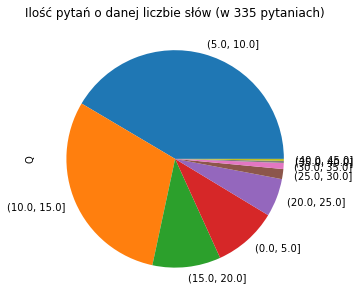

In [8]:
q_pie = binned_q_lengths.value_counts().plot(kind="pie", y="value_column", figsize=(5, 5))
q_pie.set_title(f"Ilość pytań o danej liczbie słów (w {df.shape[0]} pytaniach)")

Text(0.5, 1.0, 'Ilość odpowiedzi o danej liczbie słów (w 335 Odpowiedziach)')

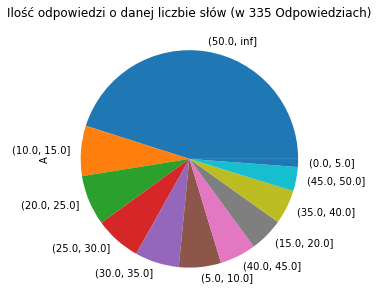

In [9]:
a_pie = binned_a_lengths.value_counts().plot(kind="pie", y="value_column", figsize=(5, 5))
a_pie.set_title(f"Ilość odpowiedzi o danej liczbie słów (w {df.shape[0]} Odpowiedziach)")

Text(0.5, 1.0, 'Histogram długości pytań liczonej w liczbie słów.')

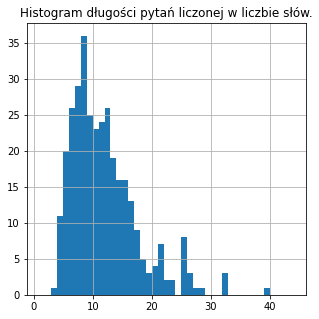

In [10]:
q_hist = question_lengths.hist(bins=range(1, question_lengths.values.max()), figsize=(5, 5))
q_hist.set_title(f"Histogram długości pytań liczonej w liczbie słów.")

Text(0.5, 1.0, 'Histogram długości odpowiedzi liczonej w liczbie słów.')

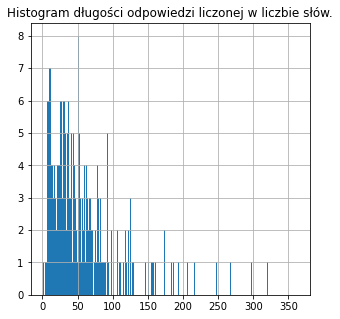

In [11]:
a_hist = answer_lengths.hist(bins=range(1, answer_lengths.values.max()), figsize=(5, 5))
a_hist.set_title(f"Histogram długości odpowiedzi liczonej w liczbie słów.")

Text(0.5, 1.0, 'Histogram długości odpowiedzi liczonej w liczbie zdań.')

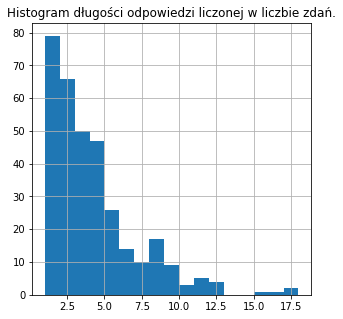

In [12]:
a_sent_hist = answer_no_sentences.hist(bins=range(1, answer_no_sentences.values.max()), figsize=(5, 5))
a_sent_hist.set_title(f"Histogram długości odpowiedzi liczonej w liczbie zdań.")

Text(0.5, 1.0, 'Ilość odpowiedzi liczonej w liczbie zdań.')

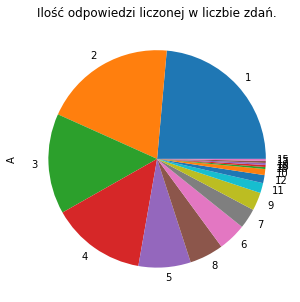

In [13]:
a_sent_pie = answer_no_sentences.value_counts().plot(kind="pie", y="value_column", figsize=(5, 5))
a_sent_pie.set_title(f"Ilość odpowiedzi liczonej w liczbie zdań.")

W bazie znajduje się dość dużo bardzo długich odpowiedzi. Bez zastosowania algorytmu do ekstrakcji odpowiedzi z tekstu może okazać się to problemem kiedy np. pytanie jest dość konkretne a odpowiedź występuję dopiero w kolejnych zdaniach dość długiego dokumentu.

Jeżeli chcielibyśmy np. fine tune'ować model łatwo da się też przekonwertować dane do postaci Datasetu HuggingFace, który też udostępnia ograniczone API do transformacji danych (np. metodę `map()`) 

In [14]:
ds = Dataset.from_pandas(df)
ds

Dataset({
    features: ['Q', 'A', '__index_level_0__'],
    num_rows: 335
})

Zdefiniujemy sobie tutaj kilka funkcji, m.in. do preprocessingu, które ułatwią mi zabawę z danymi zarówno przy ich eksploracji jak i w trakcie testowania różnych rozwiązań.

Tutaj wykorzystuję bardzo przydatne API HuggingFace w klasach `AutoModel` i `AutoTokenizer`, które bardzo przyśpieszają prototypowanie i eksperymenty z różnymi checkpointami i architekturami modeli. HF jest w stanie automatycznie wykryć architekturę modelu i go zainicjować. Dostępne są też klasy typu `AutoModelFor*` np. `AutoModelForQuestionAnswering`, które wykorzystują core dowolnego modelu i dodają do niego automatycznie wygenerowany *Head* dla konkretnego zadania. W naszym przypadku nie jest to koniecznie bo będzie wykorzystywali tylko enkoder do budowy reprezentacji semantycznej tekstu. Wykorzystany tutaj model to SentenceBert. Pod spodem HF wykorzystuje specjalną libkę Sentence-Bert https://www.sbert.net/docs/usage/semantic_textual_similarity.html. W pierwszej iteracji tego rozwiązania też z niej korzystałem ale uznałem, że nie ma sensu utrudniać sobie życia :) Swoją drogą w trakcie przygotowywania się do realizacji tego zadania zrobiłem kurs HuggingFace Transformers i stałem się wielkim fanem :)
W ostatnim kroku ładujemy model do GPU bo szanujemy swój czas.

In [15]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_CHECKPOINT)
model = AutoModel.from_pretrained(MODEL_CHECKPOINT)
model.to(device)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(50000, 1024, padding_idx=1)
    (position_embeddings): Embedding(514, 1024)
    (token_type_embeddings): Embedding(2, 1024)
    (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=1024, out_features=1024, bias=True)
            (key): Linear(in_features=1024, out_features=1024, bias=True)
            (value): Linear(in_features=1024, out_features=1024, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=1024, out_features=1024, bias=True)
            (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=Fals

Definiujemy sobie funkcję pomocniczą do *poolowania* i do parametryzacji tekstu pod postacią embeddingsów.

Generujemy sobie dataset pod postacią samych embeddingsów i dodajemy index FAISS (korzystałem też z niego np. przy wyszukiwaniu twarzy). W przypadku budowy prawdziwego rozwiązania można w ramach optymalizacji należało by to wrzucić do bazy danych, która:
- wspiera taki format danych (wektory)
- implementuje podobieństwo cosinusowe lub inną podobną miarę jako operację za pomocą, której możemy wyszukiwać rekordy.

Przy większych bazach pytań pewnie warto pomyśleć też o zindexowaniu i przeszukiwaniu np. za pomocą Solr'a.

In [16]:
def _cls_pool_embeddings(model_output):
    return model_output.last_hidden_state[:, 0]


def get_embeddings(text_list):
    encoded_input = tokenizer(
        text_list, padding=True, truncation=True, return_tensors="pt"
    )
    encoded_input = {k: v.to(device) for k, v in encoded_input.items()}
    model_output = model(**encoded_input)

    return _cls_pool_embeddings(model_output)

In [17]:
embeddings_dataset = ds.map(
    lambda x: {"embeddings": get_embeddings(x["Q"]).detach().cpu().numpy()[0]}
)

Map:   0%|          | 0/335 [00:00<?, ? examples/s]

In [18]:
embeddings_dataset.add_faiss_index(column="embeddings")

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset({
    features: ['Q', 'A', '__index_level_0__', 'embeddings'],
    num_rows: 335
})

Możemy już sprawdzić jak działa wyjściowy system.

In [19]:
#@title Wpisz pytanie
question = 'Czy wietrzenie pomieszczenia zapobiega rozprzestrzenianiu si\u0119 koronawirusa?' #@param {type:"string"}


In [20]:
def get_nearest_samples(question, embeddings_dataset, k=5):
  question_embedding = get_embeddings([question]).cpu().detach().numpy()

  scores, samples = embeddings_dataset.get_nearest_examples(
      "embeddings", question_embedding, k=k
  )

  return scores, samples

In [21]:
def print_sep_line():
  print("=" * 50)

def print_answer(question, matched_db_question, answer):
  print_sep_line()
  print(f"INPUT QUESTION: {question}")
  print(f"MATCHED DB QUESTION: {matched_db_question}")
  print(f"ANSWER: {answer}")
  print_sep_line()

In [22]:
def get_embeddings_answer(question, embeddings_dataset):
  scores, samples = get_nearest_samples(question, embeddings_dataset)

  samples_df = pd.DataFrame.from_dict(samples)
  samples_df["scores"] = scores
  samples_df.sort_values("scores", ascending=False, inplace=True)

  best_ans = samples_df.iloc[0]

  print_answer(question, best_ans.Q, best_ans.A)

  return best_ans

In [23]:
best_ans = get_embeddings_answer(question, embeddings_dataset)

INPUT QUESTION: Czy wietrzenie pomieszczenia zapobiega rozprzestrzenianiu się koronawirusa?
MATCHED DB QUESTION: Czy lampa dezynfekująca na promienie UV może zabić nowego koronawirusa?
ANSWER: Lampy UV przeznaczone są do dezynfekcji pomieszczeń, nie powinny być używane do sterylizacji rąk lub innych obszarów skóry, ponieważ promieniowanie UV może powodować podrażnienie skóry.


Jak widać system dość dobrze radzi sobie ze znalezieniem podobnych pytań w bazie na poziomie słownictwa - niestety nie zawsze oznacza to znalezienie najbardziej odpowiedniej odpowiedzi na zadane pytanie.

Dla zabawy możemy też zobaczyć jak poradziłby sobie model do ekstraktywnego QA:

In [24]:
extractive_qa_pipeline = pipeline(
    "question-answering",
    model="henryk/bert-base-multilingual-cased-finetuned-polish-squad2",
    tokenizer="henryk/bert-base-multilingual-cased-finetuned-polish-squad2"
)

In [25]:
context = best_ans.A
extr_ans = extractive_qa_pipeline({'context': context, 'question': question})

print_answer(question, context, extr_ans.get('answer', '???'))

INPUT QUESTION: Czy wietrzenie pomieszczenia zapobiega rozprzestrzenianiu się koronawirusa?
MATCHED DB QUESTION: Lampy UV przeznaczone są do dezynfekcji pomieszczeń, nie powinny być używane do sterylizacji rąk lub innych obszarów skóry, ponieważ promieniowanie UV może powodować podrażnienie skóry.
ANSWER: nie powinny być używane do sterylizacji rąk


W tym przypadku wyniki często bywają dużo gorsze - jak powyżej - system udzielił dokładnie odwrotnej odpowiedzi niż powinien.

Nie dysponujemy niestety żadnym zbiorem testowym, na którym można by przetestować działanie naszego rozwiązania. Pozostaje nam ręczne testowanie i trochę pośrednich miar, które można by wyliczyć.

Zbudujemy również prosty model, który będzie mógł stanowić nasz benchmark w trakcie testów.

W tym celu skorzystam z rozwiązania opisanego jako 
[propozycja 2 (TFIDF)](#tfidf) oraz biblioteki SpaCy. Na podstawie wektora TFIDF będziemy wyszukiwali podobne pytania za pomocą podobieństwa cosinusowego.

In [26]:
nlp = spacy.load("pl_core_news_sm")

# Usuwamy niepotrzebne elementy pipeline'u
print("Pipeline NLP SpaCy")
print("Przed: ", ", ".join(nlp.pipe_names))
for proc_step in ["parser", "attribute_ruler", "ner"]:
  nlp.remove_pipe(proc_step)
print("Po: ", ", ".join(nlp.pipe_names))

Pipeline NLP SpaCy
Przed:  tok2vec, morphologizer, parser, lemmatizer, tagger, attribute_ruler, ner
Po:  tok2vec, morphologizer, lemmatizer, tagger


In [27]:
def preprocess(doc):
  # Tokenizacja, lematyzacja i filtrowanie stopwordsów za pomocą SpaCy
  return [tok.lemma_ for tok in nlp(doc) if not tok.is_stop and not tok.is_punct]

In [28]:
df["Q_preprocessed"] = df["Q"].apply(preprocess)
df["Q_preprocessed"].values[:20]

array([list(['objaw', 'charakterystyczny', 'koronawiruso']),
       list(['zrobić', 'przypadek', 'wystąpić', 'duszność', 'trudność', 'oddychanie']),
       list(['objaw', 'charakterystyczny', 'COVID', '19', 'powinien być', 'zrobić', 'pierwszy', 'kolejność']),
       list(['móc', 'skontaktować', 'swój', 'lekarz', 'POZ', 'zrobić']),
       list(['lekarz', 'POZ', 'dyżurować', 'objawy', 'COVID', '19', 'zrobić']),
       list(['skierować', 'test', 'wystawić', 'lekarz', 'POZ', 'lekarz', 'nocny', 'świąteczny', 'telepomoc', 'wystawić', 'skierowanie']),
       list(['znaleźć', 'wynik', 'test']),
       list(['wynik', 'test', 'pozytywny', 'zostana', 'poinformować']),
       list(['skontaktować być', 'sanepidem', 'pomoc', 'formularz', 'strona', 'dostać', 'odpowiedź', 'pytanie']),
       list(['znaczyć', 'mieć być', 'bliski', 'kontakt', 'osoba', 'chory']),
       list(['mieć być', 'bliski', 'kontakt', 'osoba', 'otrzymać', 'pozytywny', 'wynik', 'test', 'powinien być', 'zgłosić']),
       list(['dos

In [29]:
# Pomijamy wbudowany preprocesor i użyjemy uni- i bigramów żeby oszukać i przemycić trochę semantyki dystrybucyjnej ;)
tfidf = TfidfVectorizer(ngram_range=(1, 2), tokenizer=preprocess, stop_words=None, lowercase=False)    
tfidf_docs_arr = tfidf.fit_transform(df["Q"])

Możemy sprawdzić czy nasz `TfidfVectorizer` zadziałał jak trzeba sprawdzając vocabulary.

In [30]:
list(tfidf.vocabulary_)[:20]

['objaw',
 'charakterystyczny',
 'koronawiruso',
 'objaw charakterystyczny',
 'charakterystyczny koronawiruso',
 'zrobić',
 'przypadek',
 'wystąpić',
 'duszność',
 'trudność',
 'oddychanie',
 'zrobić przypadek',
 'przypadek wystąpić',
 'wystąpić duszność',
 'duszność trudność',
 'trudność oddychanie',
 'COVID',
 '19',
 'powinien być',
 'pierwszy']

In [31]:
def get_tfidf_sim(vectorizer, docs_tfidf, query):
    query_tfidf = vectorizer.transform([query])
    cosineSimilarities = cosine_similarity(query_tfidf, docs_tfidf).flatten()
    return cosineSimilarities

In [32]:
def get_tfidf_answer(question, tfidf, tfidf_docs_arr):
  top_sim_index = get_tfidf_sim(tfidf, tfidf_docs_arr, question).argmax()

  matched_question = df["Q"].iloc[top_sim_index]
  matched_answer = df["A"].iloc[top_sim_index]
  print_answer(question, matched_question, matched_answer)

In [33]:
get_tfidf_answer(question, tfidf, tfidf_docs_arr)

INPUT QUESTION: Czy wietrzenie pomieszczenia zapobiega rozprzestrzenianiu się koronawirusa?
MATCHED DB QUESTION: Jak zdezynfekować pomieszczenia w zakładzie pracy, w którym przebywała osoba chora lub podejrzana o zachorowanie na koronawirusa? Kto powinien potwierdzić, że ta dezynfekcja miała miejsce?
ANSWER: Osoba odpowiedzialna za dezynfekcję pomieszczenia oraz sposób jej dokumentacji powinna być określona przez pracodawcę. W sprawie dezynfekcji pomieszczenia możemy posiłkować się wytycznymi GIS dla POZ (dotyczące dezynfekcji pomieszczenia, w której przebywała osoba chora lub podejrzana o zachorowanie na koronawirusa), tj. wyłączyć z funkcjonowania pomieszczenie, w którym przebywała osoba zakażona, umyć i zdezynfekować powierzchnie, meble, sprzęt – po dezynfekcji może być ponownie używane, wywietrzyć pomieszczenie, w którym przebywała osoba zakażona, zdezynfekować drogę lub drogi dojścia do pomieszczenia gdzie przebywała osoba zakażona do pomieszczenia (poręcze schodów, klamki, lady i

Wygląda na to, że musimy dodać wszystkie określenia koronawirusa do stopwordsów bo występują zbyt często i algorytm może być na nie przewrażliwiony.

In [34]:
domain_specific_stopwords = [
    "koronawiruso",
    "COVID",
    "19",
    "COVID19",
    "coV",
    "SARS"
]

In [35]:
# Pomijamy wbudowany preprocesor i użyjemy uni- i bigramów żeby oszukać i przemycić trochę semantyki dystrybucyjnej ;)
tfidf = TfidfVectorizer(ngram_range=(1, 2), tokenizer=preprocess, stop_words=domain_specific_stopwords, lowercase=False)    
tfidf_docs_arr = tfidf.fit_transform(df["Q"])

In [36]:
list(tfidf.vocabulary_)[:20]

['objaw',
 'charakterystyczny',
 'objaw charakterystyczny',
 'zrobić',
 'przypadek',
 'wystąpić',
 'duszność',
 'trudność',
 'oddychanie',
 'zrobić przypadek',
 'przypadek wystąpić',
 'wystąpić duszność',
 'duszność trudność',
 'trudność oddychanie',
 'powinien być',
 'pierwszy',
 'kolejność',
 'charakterystyczny powinien być',
 'powinien być zrobić',
 'zrobić pierwszy']

In [37]:
top_sim_index = get_tfidf_sim(tfidf, tfidf_docs_arr, question).argmax()

matched_question = df["Q"].iloc[top_sim_index]
matched_answer = df["A"].iloc[top_sim_index]
print_answer(question, matched_question, matched_answer)

INPUT QUESTION: Czy wietrzenie pomieszczenia zapobiega rozprzestrzenianiu się koronawirusa?
MATCHED DB QUESTION: Jak zdezynfekować pomieszczenia w zakładzie pracy, w którym przebywała osoba chora lub podejrzana o zachorowanie na koronawirusa? Kto powinien potwierdzić, że ta dezynfekcja miała miejsce?
ANSWER: Osoba odpowiedzialna za dezynfekcję pomieszczenia oraz sposób jej dokumentacji powinna być określona przez pracodawcę. W sprawie dezynfekcji pomieszczenia możemy posiłkować się wytycznymi GIS dla POZ (dotyczące dezynfekcji pomieszczenia, w której przebywała osoba chora lub podejrzana o zachorowanie na koronawirusa), tj. wyłączyć z funkcjonowania pomieszczenie, w którym przebywała osoba zakażona, umyć i zdezynfekować powierzchnie, meble, sprzęt – po dezynfekcji może być ponownie używane, wywietrzyć pomieszczenie, w którym przebywała osoba zakażona, zdezynfekować drogę lub drogi dojścia do pomieszczenia gdzie przebywała osoba zakażona do pomieszczenia (poręcze schodów, klamki, lady i

Możemy teraz porównać sobie nasze dwa rozwiązania uznając, że to oparte o TF-IDF jest benchmarkiem. brakuje nam zbioru danych i miary ale możemy potestować ręcznie.

Zobaczmy jeszcze jak obydwa algorytmy poradzą sobie w przypadku rozbicia wszystkich dostępnych odpowiedzi na pojedyncze zdania i wyszukiwania w tak powstałym zbiorze za pomocą obydwu dostępnych metod. Ponieważ w zdaniach występują kropki po skrótach musiałem chociaż wstępnie zabezpieczyć przed rozbjaniem zdań w tych miejscach.

Na tym etapie uciążliwy jest już brak funkcji do wykonywania powtarzalnego kodu (DRY) ale niestety nie starczyło mi już czasu na porządki. Ctrl+C + Ctrl+V 

In [38]:
sent_tokenizer_regexp = re.compile("(?<!Dz)(?<!U)(?<!r)(?<!poz)[.?!]+\s+")
df["A_sentences"] = df.A.apply(lambda x: [sent for sent in sent_tokenizer_regexp.split(x) if sent]).values

a_sentences_dict = {
    "a_sentence": [],
    "original_dataframe_index": []
}

for df_index, row in df.iterrows():
  for sent in row["A_sentences"]:
    a_sentences_dict["a_sentence"].append(sent)
    a_sentences_dict["original_dataframe_index"].append(df_index - 1)

df_sentences = pd.DataFrame.from_dict(a_sentences_dict)
a_sent_ds = Dataset.from_pandas(df_sentences)

a_sent_embeddings_dataset = a_sent_ds.map(
    lambda x: {"embeddings": get_embeddings(x["a_sentence"]).detach().cpu().numpy()[0]}
)
a_sent_embeddings_dataset.add_faiss_index(column="embeddings")

Map:   0%|          | 0/1015 [00:00<?, ? examples/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Dataset({
    features: ['a_sentence', 'original_dataframe_index', 'embeddings'],
    num_rows: 1015
})

In [39]:
scores, samples = get_nearest_samples(question, a_sent_embeddings_dataset, k=10)

samples_df = pd.DataFrame.from_dict(samples)
samples_df["scores"] = scores
samples_df.sort_values("scores", ascending=False, inplace=True)

samples_df

,a_sentence,original_dataframe_index,embeddings,scores
9,"Tak więc w przypadku mięsa, produktów surowych...",324,"[0.16496649384498596, -0.03218463808298111, -0...",197.565567
8,Dowiedź się więcej o zasadach izolacji.,41,"[0.16313602030277252, 0.6580018401145935, 0.10...",190.853897
7,"Aby uchronić się przed nowym koronawirusem, na...",327,"[-0.16600103676319122, 0.43667295575141907, -0...",190.569153
6,Należy także unikać bliskiego kontaktu z każdy...,332,"[-0.06034249812364578, 0.2664748728275299, 0.1...",183.188492
5,Noszenie rękawiczek w miejscach publicznych zm...,222,"[-0.07240550965070724, 0.15883129835128784, -0...",182.495010
4,Samochód trzeba również wywietrzyć,65,"[-0.28388386964797974, -0.409058153629303, -0....",181.149109
3,"Nie ma dowodów na to, że regularne płukanie no...",330,"[0.07561793178319931, 0.13531745970249176, -0....",180.576691
2,Koronawirus ulega zniszczeniu gdy zastosuje si...,324,"[-0.27627232670783997, -0.15678440034389496, -...",174.047318
1,Rozpylanie alkoholu lub chloru na całym ciele ...,326,"[-0.1579146385192871, 0.29090556502342224, -0....",167.217987
0,"Nie ma powodu sądzić, że zimna pogoda może zab...",332,"[-0.7416771054267883, -0.08485336601734161, -0...",128.940689


Pojedyncze zdania wybrane spośród odpowiedzi wyglądają dobrze. Zobaczmy co się stanie gdy je połączymy i podamy jako konktest do pipeline'u extractive QA..

In [40]:
a_sent_context = re.sub(r"\.+", ".", ". ".join(samples_df.a_sentence.values.tolist()))
a_sent_context


'Tak więc w przypadku mięsa, produktów surowych, typowa obróbka cieplna eliminuje zanieczyszczenie mikrobiologiczne, w tym również SARS COV-2. Dowiedź się więcej o zasadach izolacji. Aby uchronić się przed nowym koronawirusem, należy często myć ręce wodą i mydłem oraz dezynfekować je płynem na bazie alkoholu. Należy także unikać bliskiego kontaktu z każdym, kto kaszle i kicha. Noszenie rękawiczek w miejscach publicznych zmniejsza ryzyko zakażenia koronawirusem. Samochód trzeba również wywietrzyć. Nie ma dowodów na to, że regularne płukanie nosa solą fizjologiczną chroni przed zakażeniem nowym koronawirusem. Koronawirus ulega zniszczeniu gdy zastosuje się odpowiednią kombinację czasu i temperatury np. Rozpylanie alkoholu lub chloru na całym ciele nie zabije wirusów, które już dostały się do organizmu. Nie ma powodu sądzić, że zimna pogoda może zabić koronawirusa lub inne choroby'

In [41]:
extr_ans = extractive_qa_pipeline({'context': a_sent_context, 'question': question})

print_answer(question, a_sent_context, extr_ans.get('answer', '???'))

INPUT QUESTION: Czy wietrzenie pomieszczenia zapobiega rozprzestrzenianiu się koronawirusa?
MATCHED DB QUESTION: Tak więc w przypadku mięsa, produktów surowych, typowa obróbka cieplna eliminuje zanieczyszczenie mikrobiologiczne, w tym również SARS COV-2. Dowiedź się więcej o zasadach izolacji. Aby uchronić się przed nowym koronawirusem, należy często myć ręce wodą i mydłem oraz dezynfekować je płynem na bazie alkoholu. Należy także unikać bliskiego kontaktu z każdym, kto kaszle i kicha. Noszenie rękawiczek w miejscach publicznych zmniejsza ryzyko zakażenia koronawirusem. Samochód trzeba również wywietrzyć. Nie ma dowodów na to, że regularne płukanie nosa solą fizjologiczną chroni przed zakażeniem nowym koronawirusem. Koronawirus ulega zniszczeniu gdy zastosuje się odpowiednią kombinację czasu i temperatury np. Rozpylanie alkoholu lub chloru na całym ciele nie zabije wirusów, które już dostały się do organizmu. Nie ma powodu sądzić, że zimna pogoda może zabić koronawirusa lub inne choro

Niestety nie udało się w ten sposób rozwiązać problemu z tym dość trudnym przykładem. Wszystkie metody działają jednak dość dobrze dla typowych pytań, dla których znajdujemy odpowiedź w bazie FAQ.

In [42]:
#@title Wpisz pytanie
question = 'Gdzie mog\u0119 wykona\u0107 test na COVID-19?' #@param {type:"string"}


In [43]:
def get_extractive_answer(question, embeddings_dataset):

  scores, samples = get_nearest_samples(question, embeddings_dataset)

  samples_df = pd.DataFrame.from_dict(samples)
  samples_df["scores"] = scores
  samples_df.sort_values("scores", ascending=False, inplace=True)

  a_sent_context = re.sub(r"\.+", ".", ". ".join(samples_df.a_sentence.values.tolist()))

  extr_ans = extractive_qa_pipeline({'context': a_sent_context, 'question': question})


  print_answer(question, a_sent_context, extr_ans.get('answer', '???'))

In [44]:
def print_sep():
  print("\n" * 2)

In [45]:
print_sep_line()
print("Extractive SBERT Embeddings podobieństwo cosinusowe na pojedyńczych zdaniach z pociętych odpowiedzi z FAQ.")
get_extractive_answer(question, a_sent_embeddings_dataset)
print_sep()
print_sep_line()
print("SBERT Embeddings podobieństwo cosinusowe na całych pytaniach z FAQ.")
get_embeddings_answer(question, embeddings_dataset)
print_sep()
print_sep_line()
print("TFIDF podobieństwo cosinusowe na całych pytaniach z FAQ.")
get_tfidf_answer(question, tfidf, tfidf_docs_arr)

Extractive SBERT Embeddings podobieństwo cosinusowe na pojedyńczych zdaniach z pociętych odpowiedzi z FAQ.
INPUT QUESTION: Gdzie mogę wykonać test na COVID-19?
MATCHED DB QUESTION: Test musi zostać wykonany przed przekroczeniem granicy, w okresie 48 godzin, licząc od momentu wyniku tego testu. Jeżeli wynik Twojego testu jest pozytywny, laboratorium w którym robiłeś badanie umieści taką informację w systemie EWP. Test powinien być wykonany jak najszybciej. Test mogą zrobić osoby posiadające zlecenie na badanie. Test jest bezpłatny.
ANSWER: laboratorium



SBERT Embeddings podobieństwo cosinusowe na całych pytaniach z FAQ.
INPUT QUESTION: Gdzie mogę wykonać test na COVID-19?
MATCHED DB QUESTION: Gdzie znajdę informację o wyniku testu?
ANSWER: Po wykonaniu badania wynik zobaczysz na swoim Internetowym Koncie Pacjenta, będziesz o nim również poinformowany przez lekarza POZ. 



TFIDF podobieństwo cosinusowe na całych pytaniach z FAQ.
INPUT QUESTION: Gdzie mogę wykonać test na COVID-19?
MAT

Tutaj chciałem jeszcze wykorzystać fakt, że wszystkie rozwiązania mają swoje wady i zalety, które dodatkowo różnią się między sobą, i chciałem pozwolić im współpracować korzystając faktu, że np. zespół słabych klasyfikatorów osiąga dużo lepsze wyniki niż każdy z osobna. Miałem zbudować jeszcze jeden model w oparciu o gensim Doc2Vec i wyniki z wszystkich poddać głosowaniu większościowemu ale niestety już nie zdążyłem. :)

Miłej lektury i przepraszam za bałagan ale na porządki już też nie starczyło czasu.


</br>
<center>
<img src="https://drive.google.com/uc?id=19XZZAygrwhG0I1Zh_cRz85s8BBXT8R9H" alt="covidqa" width="100"/>
</center>
</br>